In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
from scipy.special import erf
import matplotlib.cm as cm
import matplotlib
import random

import sys
import os


In [41]:

# Get the current working directory
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory
sibling_dir = os.path.join(parent_dir, "02_simulation_code")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module 
import AR1model

## Generate random sample of varying skewness

In [1]:
def interleave_and_remove_duplicates(a, b):
    """
    Interleave two lists and remove duplicates.

    This function alternates elements from two lists, `a` and `b`, 
    ensuring no duplicate elements are added to the resulting list.

    Parameters:
    - a: List of elements to interleave.
    - b: List of elements to interleave.

    Returns:
    - result: A list with elements alternated between `a` and `b` 
      while removing duplicates.
    """
    result = []
    for i in range(len(a)):
        if a[i] not in result:
            result.append(a[i])
        if b[i] not in result:
            result.append(b[i])
    return result

def swap_random_elements(lst1, n):
    """
    Swap two random elements of a list multiple times.

    This function performs `n` random swaps on a given list, 
    creating a new list with the elements shuffled.

    Parameters:
    - lst1: The list on which swaps are performed.
    - n: The number of random swaps to perform.

    Returns:
    - lst: A new list with `n` random swaps applied.
    """
    length = len(lst1)
    lst = lst1.copy()
    for _ in range(n):
        # Select two distinct random indices
        idx1, idx2 = random.sample(range(length), 2)
        
        # Swap the elements at the selected indices
        lst[idx1], lst[idx2] = lst[idx2], lst[idx1]
    
    return lst

def transform_sample(sample):
    """
    Transform a sample by sorting it and introducing randomness.

    This function creates two versions of a given sample:
    - A sorted version.
    - A version with random swaps applied to the sorted sample.

    Parameters:
    - sample: A list of elements to be transformed.

    Returns:
    - smooth_sample: The sorted version of the input sample.
    - mixed_sample: A version of the sorted sample with random swaps applied.
    """
    smooth_sample = sorted(sample)
    mixed_sample = swap_random_elements(smooth_sample, 15)
    return smooth_sample, mixed_sample


In [43]:
mu=0
sigma=1

In [44]:
no_skew_sample=AR1model.draw_sample(mu=mu,sigma=sigma,nsample=50)
left_skew_sample=AR1model.draw_sample(mu=mu,sigma=sigma,skew=-8,nsample=100)
right_skew_sample=AR1model.draw_sample(mu=mu,sigma=sigma,skew=8,nsample=100)

In [45]:
smooth_no_skew_sample,mixed_no_skew_sample=transform_sample(no_skew_sample)
smooth_left_skew_sample,mixed_left_skew_sample=transform_sample(left_skew_sample)
smooth_right_skew_sample,mixed_right_skew_sample=transform_sample(right_skew_sample)

## Generate skew normal distributions

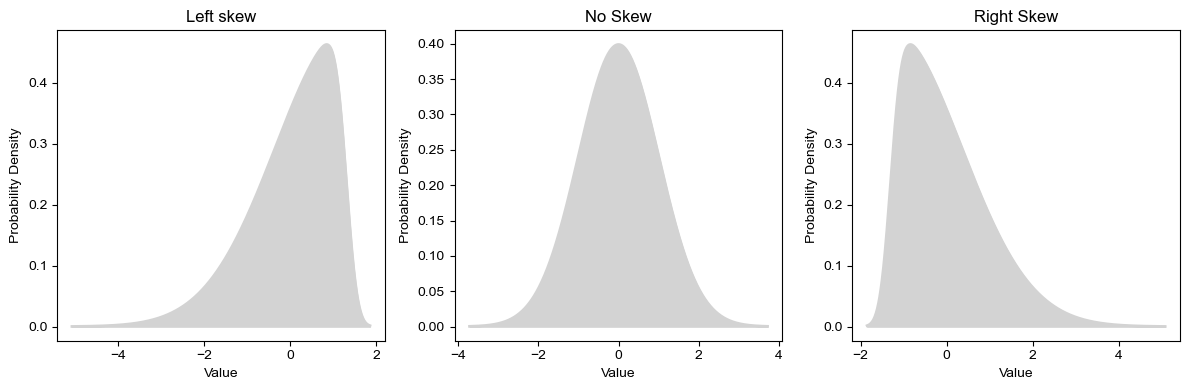

In [46]:

# Plotting both skew normal distributions side by side

# Setting up the figure for side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Skew normal distribution for alpha = -8
alpha_neg = -8
delta_neg = alpha_neg / np.sqrt(1 + alpha_neg**2)
sigma_neg = np.sqrt(1 / (1 - 2 * delta_neg**2 / np.pi))
mu_adjusted_neg = -sigma_neg * delta_neg * np.sqrt(2 / np.pi)
x_neg = np.linspace(skewnorm.ppf(0.0001, alpha_neg, loc=mu_adjusted_neg, scale=sigma_neg), 
                    skewnorm.ppf(0.9999, alpha_neg, loc=mu_adjusted_neg, scale=sigma_neg), 1000)
y_neg = skewnorm.pdf(x_neg, alpha_neg, loc=mu_adjusted_neg, scale=sigma_neg)


# Skew normal distribution for alpha = 0
alpha_0 = 0
delta_0 = alpha_0 / np.sqrt(1 + alpha_0**2)
sigma_0 = np.sqrt(1 / (1 - 2 * delta_0**2 / np.pi))
mu_adjusted_0 = -sigma_0 * delta_0 * np.sqrt(2 / np.pi)
x_0 = np.linspace(skewnorm.ppf(0.0001, alpha_0, loc=mu_adjusted_0, scale=sigma_0), 
                  skewnorm.ppf(0.9999, alpha_0, loc=mu_adjusted_0, scale=sigma_0), 1000)
y_0 = skewnorm.pdf(x_0, alpha_0, loc=mu_adjusted_0, scale=sigma_0)

# Skew normal distribution for alpha = 8
alpha_pos = 8
delta_pos = alpha_pos / np.sqrt(1 + alpha_pos**2)
sigma_pos = np.sqrt(1 / (1 - 2 * delta_pos**2 / np.pi))
mu_adjusted_pos = -sigma_pos * delta_pos * np.sqrt(2 / np.pi)
x_pos = np.linspace(skewnorm.ppf(0.0001, alpha_pos, loc=mu_adjusted_pos, scale=sigma_pos), 
                    skewnorm.ppf(0.9999, alpha_pos, loc=mu_adjusted_pos, scale=sigma_pos), 1000)
y_pos = skewnorm.pdf(x_pos, alpha_pos, loc=mu_adjusted_pos, scale=sigma_pos)


# Plot for alpha = -32
axs[0].fill_between(x_neg, y_neg, color=lightgrey, alpha=1)
axs[0].plot(x_neg, y_neg, color=lightgrey, lw=2)
axs[0].set_title(r'Left skew')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Probability Density')
# axs[0].grid(True)


# Plot for alpha = 0
axs[1].fill_between(x_0, y_0, color=lightgrey, alpha=1)
axs[1].plot(x_0, y_0, color=lightgrey, lw=2)
axs[1].set_title(r'No Skew')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Probability Density')
# axs[1].grid(True)

# Plot for alpha = 32
axs[2].fill_between(x_pos, y_pos, color=lightgrey, alpha=1)
axs[2].plot(x_pos, y_pos, color=lightgrey, lw=2)
axs[2].set_title(r'Right Skew')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Probability Density')


# Show the combined plot
plt.tight_layout()
plt.savefig("output/skew_dist_fig.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Plotting

In [47]:
# Custom black color
myblack = "#222222"
mediumgrey='#abadaa'
lightgrey="#D3D3D3"
# Set font globally
matplotlib.rcParams['font.family'] = 'Helvetica, Arial, sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica, Arial, sans-serif'  # Fallback to Arial if Helvetica is not available

In [48]:
reds = plt.get_cmap('Reds')
blues = plt.get_cmap('Blues')
greens = plt.get_cmap('Greens')

In [49]:
myred=reds(0.5)
myblue=blues(0.5)
midgreen=greens(0.5)
mygreen=greens(0.2)

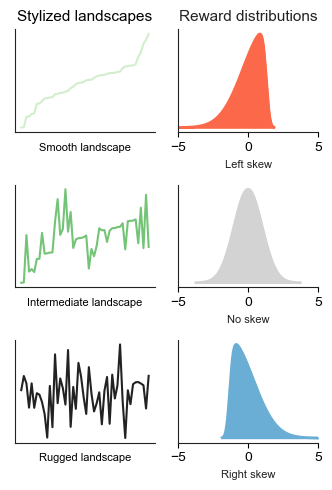

In [50]:

# Assuming smooth, mixed, rough, and other necessary variables are defined
# For the sake of example, these variables are just placeholders

suptitle = "Landscape properties"

# Combined figure setup
fig, axs = plt.subplots(3, 2, figsize=(3.42, 5),dpi=100)  # 2x3 grid for combined plots


# First row for landscape plots
axs[0, 0].plot(smooth_no_skew_sample, color=mygreen)
axs[1, 0].plot(mixed_no_skew_sample, color=midgreen)
axs[2, 0].plot(no_skew_sample, color=myblack)

# Titles for the first column
axs[0, 0].set_title('Stylized landscapes',fontsize=11)
axs[0, 0].set_xlabel('Smooth landscape',fontsize=8)
axs[1, 0].set_xlabel('Intermediate landscape',fontsize=8)
axs[2, 0].set_xlabel('Rugged landscape',fontsize=8)

# Second row for skewness distributions
# Assuming x_neg, y_neg, x_0, y_0, x_pos, y_pos are defined from skewnorm calculations

# Plot skewness distributions in the second row
axs[0, 1].fill_between(x_neg, y_neg, color=myred, alpha=1)
axs[0, 1].plot(x_neg, y_neg, color=myred, lw=2)
axs[1, 1].fill_between(x_0, y_0, color=lightgrey, alpha=1)
axs[1, 1].plot(x_0, y_0, color=lightgrey, lw=2)
axs[2, 1].fill_between(x_pos, y_pos, color=myblue, alpha=1),
axs[2, 1].plot(x_pos, y_pos, color=myblue, lw=2)

# Titles for the second column
axs[0, 1].set_title('Reward distributions',color=myblack,fontsize=11)
axs[0, 1].set_xlabel(r'Left skew',color=myblack,fontsize=8)
axs[1, 1].set_xlabel(r'No skew',color=myblack,fontsize=8)
axs[2, 1].set_xlabel(r'Right skew',color=myblack,fontsize=8)



# Labels for the second row
for ax in axs[:, 1]:
    ax.set_xlim(-5,5)
    ax.set_yticks([])

for ax in axs[:, 0]:
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])


# Set y-axis limits and remove ticks and labels for all plots if needed
for ax_row in axs:
    for ax in ax_row:
        # ax.set_ylim(0, 1)
        # ax.set_xticks([])
        # ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        for spine in ax.spines.values():
            spine.set_color(myblack)

plt.tight_layout()
plt.savefig("output/figure_1.pdf", format="pdf", bbox_inches="tight")
plt.show()